# Project Title - Hotel Booking demands #

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

### Dataset source: ###
Kaggle: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

The following Tasks are implemented in the Project:
- Data Preparation and Cleaning
- Exploratory Analysis and Visualization
- Asking and Answering Questions
- Inferences and Conclusion

#### Tools and Techniques Used: ####
- Numpy (used for operations on numeric data) 
- Pandas (used for utilising DataFrames and organising the data)
- Matplotlib (for visualization of data)
- Seaborn (used alongside Matplotlib for visualization)
- Jovian (used for downloading dataset and to run, save and upload the Notebook)


In [1]:
!pip install jovian opendatasets --upgrade --quiet

#### Let's begin by downloading the data, and listing the files within the dataset. ####

In [2]:
# Store the URL of the dataset in a variable for referencing.

dataset_url = 'https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand'


In [3]:
# Use helper library "opendatasets", which contains a collection of curated datasets and provides a helper function for direct download.

import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ytyashvi
Your Kaggle Key: ········


100%|██████████| 1.25M/1.25M [00:00<00:00, 12.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Set the Directory to dowload the list the files.

data_dir = './hotel-booking-demand'

In [5]:
# Verify that the dataset was downloaded into the directory "data_dir" and retrieve the list of files in the dataset.

import os
os.listdir(data_dir)

['hotel_bookings.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "hotel_bookings"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ruchitabt234/hotel-bookings" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ruchitabt234/hotel-bookings


'https://jovian.com/ruchitabt234/hotel-bookings'

## Data Preparation and Cleaning

#### - Load the CSV file using the Pandas library. 

We'll use the name hotel_bookings_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [10]:
# Import all packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
# Load the file #

hotel_bookings_df = pd.read_csv('hotel-booking-demand/hotel_bookings.csv')

In [12]:
hotel_bookings_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Let's explore unique values of,
- arrival_date_year
- customer_type
- reservation_Status
- meal
- Market_segment
- distribution_channel
- deposit_type
- country

In [13]:
# Listing unique "arrival_Date_year" values
hotel_bookings_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [14]:
# Listing unique "customer_type" values
hotel_bookings_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [15]:
# Listing unique "reservation_status" values
hotel_bookings_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [16]:
# Listing unique "meal" values
hotel_bookings_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [17]:
# Replacing shortform with full names#
hotel_bookings_df['meal'] = hotel_bookings_df['meal'].replace(['BB', 'FB', 'HB', 'SC'], ['Bed & Breakfast', 'Full Board', 'Half Board', 'SC'])
hotel_bookings_df['meal'].unique()                                                                     

array(['Bed & Breakfast', 'Full Board', 'Half Board', 'SC', 'Undefined'],
      dtype=object)

In [18]:
# Listing unique "distribution_channel" values
hotel_bookings_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [19]:
#Replacing "undefined" with 'direct' by assumption
hotel_bookings_df['distribution_channel']=hotel_bookings_df['distribution_channel'].replace(['Undefined'],['Direct'])
hotel_bookings_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

In [20]:
# Listing unique "deposit_type" values
hotel_bookings_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [21]:
# Listing unique "market_segment" values
hotel_bookings_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [22]:
# Listing Unqiue "Country" values
hotel_bookings_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [23]:
!pip install pycountry_convert

     |████████████████████████████████| 10.1 MB 7.8 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 317 kB 77.8 MB/s            
     |████████████████████████████████| 226 kB 93.6 MB/s            
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=abc8d09067339dcd344b6cb9ac1b7bf661cf72a24dff79e682df8cbcc1ef8af0
  Stored in directory: /home/jovyan/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [24]:
# Copy country code to a new column

hotel_bookings_df['Country_Name'] = hotel_bookings_df['country']
hotel_bookings_df.Country_Name.head(3)

0    PRT
1    PRT
2    GBR
Name: Country_Name, dtype: object

In [25]:
#Converting Country Codes to Country name

import pycountry

def findCountry (country_name):
    try:
        return pycountry.countries.get(alpha_3=country_name).name
    except:
        return ("not founded")
    
hotel_bookings_df['Country_Name'] = hotel_bookings_df.apply(lambda row: findCountry(row.country) , axis = 1)
hotel_bookings_df.Country_Name

0               Portugal
1               Portugal
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
119385           Belgium
119386            France
119387           Germany
119388    United Kingdom
119389           Germany
Name: Country_Name, Length: 119390, dtype: object

#### Fetch some basic information about the data frame

In [26]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Columns such as children, company, and agent, are stored as float type instead of integers. So we need to convert them to the integer type.

But, as we cannot convert NA values to a data type, we first need to handle any NA missing from the data set and then apply conversion functions to convert the data into a suitable data type.

 #### Handle missing, incorrect and invalid data

 Firstly, we will start by finding all the NA values in each column.

In [27]:
# Finding total count of NA values in each column #
na_values = hotel_bookings_df.isnull().sum().sort_values()
na_values[na_values>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

There are 4 Columns- company, agent, country, children with NA values.

To handle missing values:
- Replace NA values for children to 0.
- Replace agent and company with 0 as it might have booked without the help of an agent.
- Replacing NA value for country with value, "Unspecified"

In addition to this, we need to handle columns with invalid data. There are three fields stating the number of adults, children and babies reservation. There might be few columns with invalid data such as only the count of babies and no information about adults with them. To handle such case we need to drop such rows. Also to make our analysis based on the type of guest, we can consider data from all three columns i.e. adult, baby and child and categorize them in 3 segments i.e. adults and children.
Thus, 
- Drop the columns where there is no adult, baby and child.
- Inserting an additional column to categorize the vistors by different segments, Family, Adult, Children

In [28]:
# Replacing NA value of children with 0# 
hotel_bookings_df['children'].fillna(0, inplace=True)
na_values = hotel_bookings_df.isnull().sum().sort_values()
na_values[na_values>0]

country       488
agent       16340
company    112593
dtype: int64

In [29]:
# Replacing NA value of agent and company with 0# 
hotel_bookings_df['agent'].fillna(0, inplace=True)
hotel_bookings_df['company'].fillna(0, inplace=True)

na_values = hotel_bookings_df.isnull().sum().sort_values()
na_values[na_values>0]

country    488
dtype: int64

In [30]:
# Drop Rows where there is no adult, baby and child #
(hotel_bookings_df[(hotel_bookings_df.adults+hotel_bookings_df.babies+hotel_bookings_df.children)==0]) [['adults', 'children','babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


In [31]:
hotel_bookings_df = hotel_bookings_df.drop(hotel_bookings_df[(hotel_bookings_df.adults+hotel_bookings_df.babies+hotel_bookings_df.children)==0].index)


In [32]:
# Replacing NA value for country with mode 
hotel_bookings_df['country'].fillna("Not Specified", inplace=True)
hotel_bookings_df['Country_Name'].fillna("Not Specified", inplace=True)
hotel_bookings_df['Country_Name'].isnull().sum()

0

In [33]:
#Make sure the data frame has no more NA values.

na_values = hotel_bookings_df.isnull().sum().sort_values()
na_values[na_values>0]

Series([], dtype: int64)

Inserting an additional column, "Customer_Segment" to categorize the guests by different segments.

In [34]:
conditions = [
    (hotel_bookings_df['adults'] >=1) & (hotel_bookings_df['children'] >=1) & (hotel_bookings_df['babies']>=1),
    (hotel_bookings_df['adults'] >=1) & (hotel_bookings_df['children'] >=1),
    (hotel_bookings_df['adults'] >=1) & (hotel_bookings_df['babies'] >=1),
    (hotel_bookings_df['adults'] >=1) ,
    (hotel_bookings_df['children'] >=1),
    (hotel_bookings_df['children'] >=1) & (hotel_bookings_df['babies'] >=1),
    (hotel_bookings_df['babies'] >=1),
    (hotel_bookings_df['adults'] < 1) & (hotel_bookings_df['children'] <1) & (hotel_bookings_df['babies'] <1)
]

# create a list of the values we want to assign for each condition
values = ['Family', 'Family', 'Family', 'Adult', 'children', 'Invalid', 'invalid', 'All 0']

# create a new column and use np.select to assign values to it using our lists as arguments
hotel_bookings_df['Customer_Segment'] = np.select(conditions, values)

hotel_bookings_df['Customer_Segment'].value_counts()

Adult       109878
Family        9109
children       223
Name: Customer_Segment, dtype: int64

In [35]:
#Creating a new column With 
#  Weekend_1_Day(either Sunday or Saturday), 
#  Weekday(Both days), 
#  Weekend_AnyWeekday, 
# 1_weekendDay_Weekday

conditions = [
    (hotel_bookings_df['stays_in_weekend_nights'] == 1) & (hotel_bookings_df['stays_in_week_nights'] == 0),
    (hotel_bookings_df['stays_in_weekend_nights'] == 2) & (hotel_bookings_df['stays_in_week_nights'] == 0),
    (hotel_bookings_df['stays_in_weekend_nights'] == 2) & (hotel_bookings_df['stays_in_week_nights'] >= 1),
    (hotel_bookings_df['stays_in_weekend_nights'] == 1) & (hotel_bookings_df['stays_in_week_nights'] >= 1),  
    (hotel_bookings_df['stays_in_weekend_nights'] == 0) & (hotel_bookings_df['stays_in_week_nights'] > 1),
    (hotel_bookings_df['stays_in_weekend_nights'] == 0) & (hotel_bookings_df['stays_in_week_nights'] == 0),
    (hotel_bookings_df['stays_in_weekend_nights'] >= 1) & (hotel_bookings_df['stays_in_week_nights'] >= 1),
    (hotel_bookings_df['stays_in_weekend_nights'] == 0) & (hotel_bookings_df['stays_in_week_nights'] == 1),

]

# create a list of the values we want to assign for each condition
values = ['One Weekend Day', 'Weekend', 'One Weekend with Weekdays', 'One Weekend with Weekdays', 'Only Weekdays',
          'No Night Stay', "Long- Weekend with Weekdays", "One Week Day" ]

# create a new column and use np.select to assign values to it using our lists as arguments
hotel_bookings_df['Stay_Pattern'] = np.select(conditions, values)

hotel_bookings_df['Stay_Pattern'].value_counts()

One Weekend with Weekdays      56954
Only Weekdays                  34814
One Week Day                   16436
One Weekend Day                 4569
Long- Weekend with Weekdays     3434
Weekend                         2358
No Night Stay                    645
Name: Stay_Pattern, dtype: int64

In [36]:
hotel_bookings_df[hotel_bookings_df['Stay_Pattern']=="No Night Stay"]["adr"].value_counts()

0.0    645
Name: adr, dtype: int64

In [37]:
# Dropping Column with "No Night Stay" records
hotel_bookings_df = hotel_bookings_df.drop(hotel_bookings_df[hotel_bookings_df['Stay_Pattern']=="No Night Stay"].index)
hotel_bookings_df['Stay_Pattern'].value_counts()

One Weekend with Weekdays      56954
Only Weekdays                  34814
One Week Day                   16436
One Weekend Day                 4569
Long- Weekend with Weekdays     3434
Weekend                         2358
Name: Stay_Pattern, dtype: int64

In [38]:
# Convert all float values to int.
hotel_bookings_df[['children', 'company', 'agent']] = hotel_bookings_df[['children', 'company', 'agent']].astype('int64')
print(hotel_bookings_df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Get the count of number of records for guests after cleaning the data frame.

In [39]:
hotel_bookings_df.shape

(118565, 35)

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ruchitabt234/hotel-bookings" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ruchitabt234/hotel-bookings


'https://jovian.com/ruchitabt234/hotel-bookings'

## Exploratory Analysis and Visualization

Next we will explore different data of the dataset to understand the guests’ demographics, i.e., country, arrival date, month, customer type and various other columns of interest for analysis to find the outliers, incorrect, invalid and incomplete data.

#### Analysing the outliers and Invalid data from the columns.

We will start by analyzing the statistics of the data i.e. count, mean, min, max and various out measures.

In [42]:
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000,118565.000000
mean,0.372589,104.505832,2016.157635,27.157028,15.799595,0.932096,2.512790,1.860009,0.104196,0.007962,0.029511,0.087631,0.137182,0.218361,74.784692,10.680353,2.333016,102.523809,0.062759,0.571931
std,0.483496,106.915519,0.707714,13.589350,8.782227,0.995462,1.893258,0.575441,0.399119,0.097560,0.169235,0.847172,1.500699,0.637629,107.112200,53.719120,17.642783,50.005542,0.245743,0.793281
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


From the above analysis we can see some outliers.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

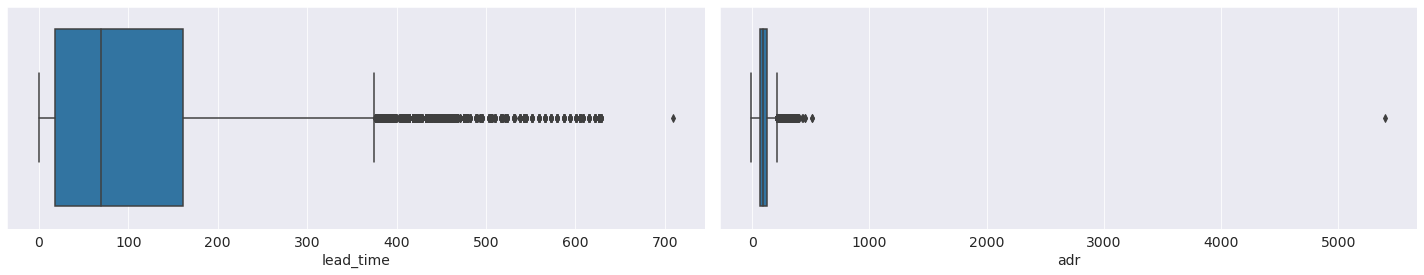

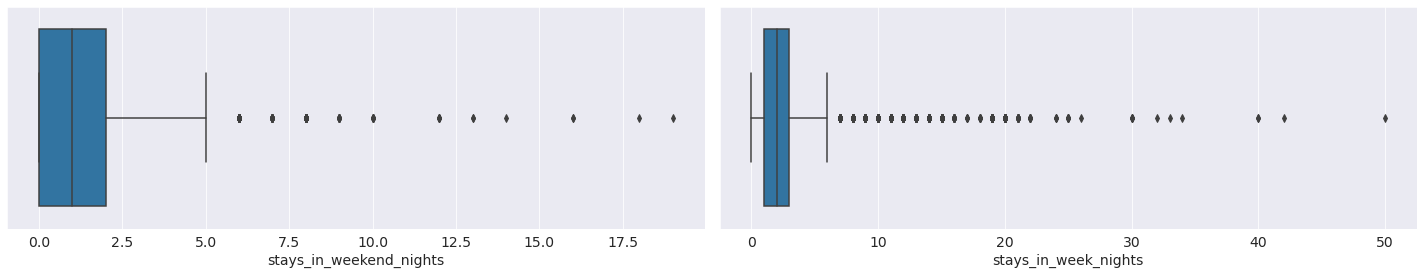

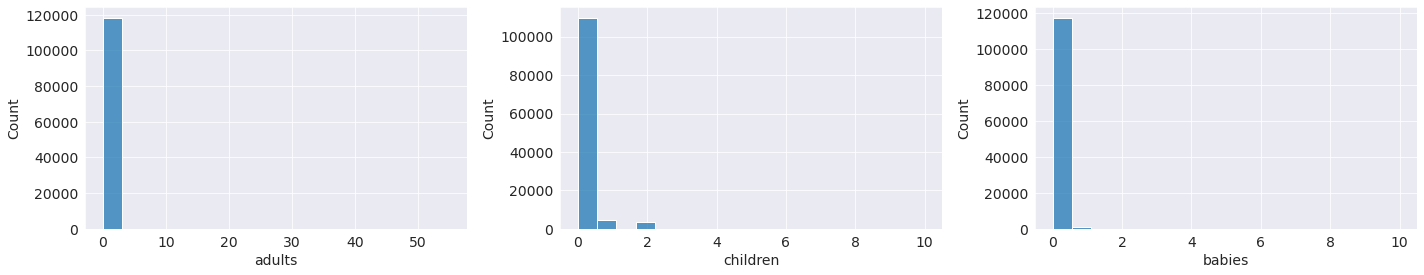

In [43]:
#plt.figure(figsize=(5,5));

cols = ['lead_time', 'adr']
n = 1
plt.figure(figsize=(20,15));

for column in cols:
  plt.subplot(4,2,n)
  n = n+1
  sns.boxplot(hotel_bookings_df[column])
  plt.tight_layout()


cols = ['stays_in_weekend_nights', 'stays_in_week_nights']
n = 1
plt.figure(figsize=(20,15));

for column in cols:
  plt.subplot(4,2,n)
  n = n+1
  sns.boxplot(hotel_bookings_df[column])
  plt.tight_layout()


columns = ['adults', 'children', 'babies']
n = 1
plt.figure(figsize=(20,15));

for column in columns:
  plt.subplot(4,3, n)
  n = n+1
  sns.histplot(hotel_bookings_df[column])
  plt.tight_layout()   
    

We can see an inappropriate outliers in case of lead_time and adr values. We can correct the inappropriate lead_time values greater than 700 by 500 and adr value greater than 500 by 500.

Number of days in weekends nights by the guest is usually between 1 or 2 days, whereas stay in week days is usually 3 to 5 days.

In [44]:
hotel_bookings_df.loc[hotel_bookings_df.lead_time > 700, 'lead_time'] = 700
hotel_bookings_df.loc[hotel_bookings_df.adr > 500, 'adr'] = 500
hotel_bookings_df.loc[hotel_bookings_df.adults >5, 'adults'] =5
hotel_bookings_df.loc[hotel_bookings_df.children >4, 'children'] =4
hotel_bookings_df.loc[hotel_bookings_df.babies >4, 'children'] =4

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


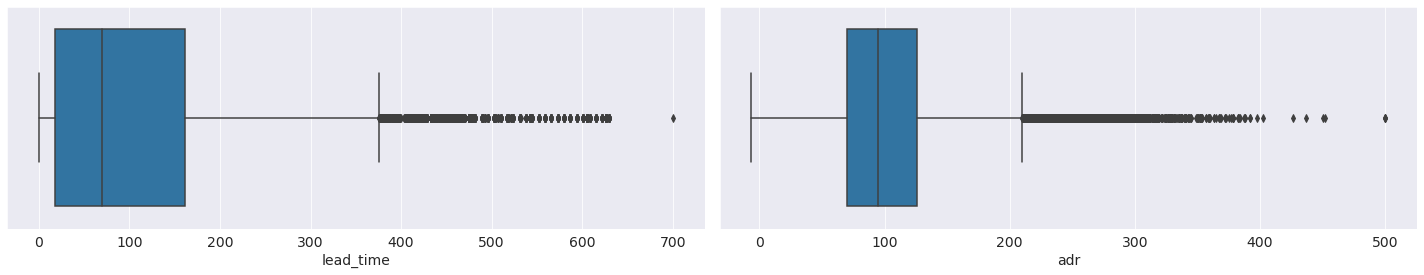

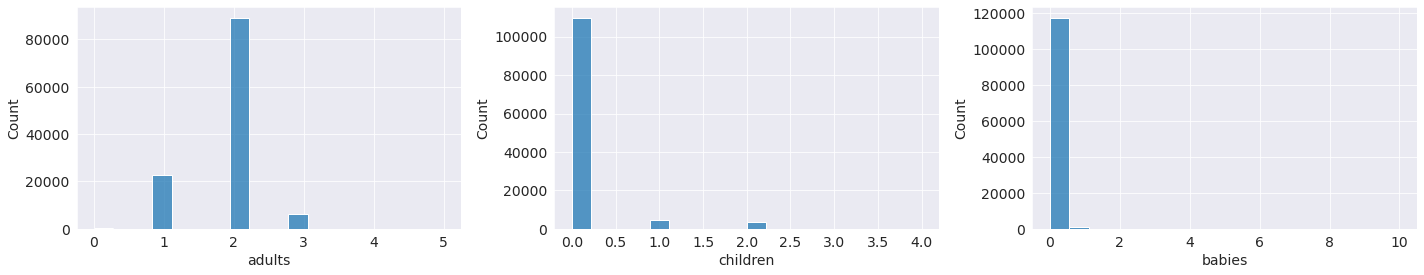

In [45]:
#plt.figure(figsize=(5,5));

cols = ['lead_time', 'adr']
n = 1
plt.figure(figsize=(20,15));

for column in cols:
  plt.subplot(4,2,n)
  n = n+1
  sns.boxplot(hotel_bookings_df[column])
  plt.tight_layout()

columns = ['adults', 'children', 'babies']
n = 1
plt.figure(figsize=(20,15));

for column in columns:
    plt.subplot(4,3, n)
    n = n+1
    sns.histplot(hotel_bookings_df[column])
    plt.tight_layout()   
    

### Analyzing Monthly trends of Average Daily Rates (ADR) ###

In [46]:
#Sorting month
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
hotel_bookings_df["arrival_date_month"] = pd.Categorical(hotel_bookings_df["arrival_date_month"], categories=ordered_months, ordered=True)

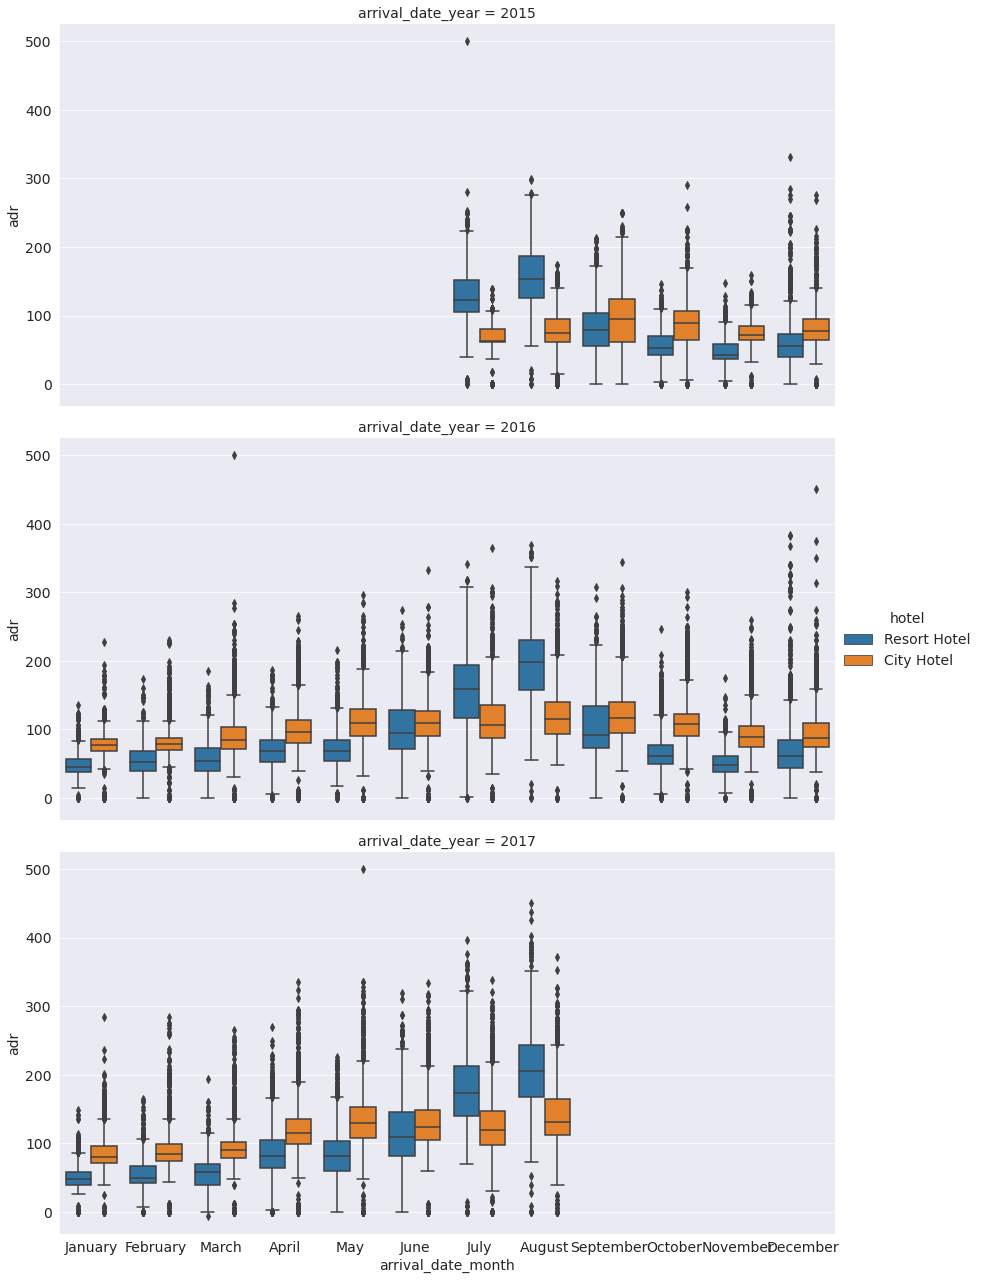

In [47]:
g = sns.catplot(x="arrival_date_month", y="adr",
                hue="hotel",
                kind="box",
                row="arrival_date_year",
                data=hotel_bookings_df, 
                height=6, 
                aspect=2)

> Analyzing ADR trends over the months between July 2015 to August 2017.
>> -  We can see that ADR for City Hotel and Resort Hotel is almost remain stable year round with a peak in ADR values in the months of July and August.
>> - City Hotels has a higher ADR than the Resort Hotel with an exception in the month of July and August where ADR value of Resort increases as compared to the City Hotel.
>> - Average ADR for both Resort Hotel and City Hotel is between 30 and 100 with an exceptional increase of ADR above 100 during the month of July and August. 
>> - ADR values normally drops during the start and end of the year.

### Analyzing Yearly trends of (Average Daily Rates) ADR

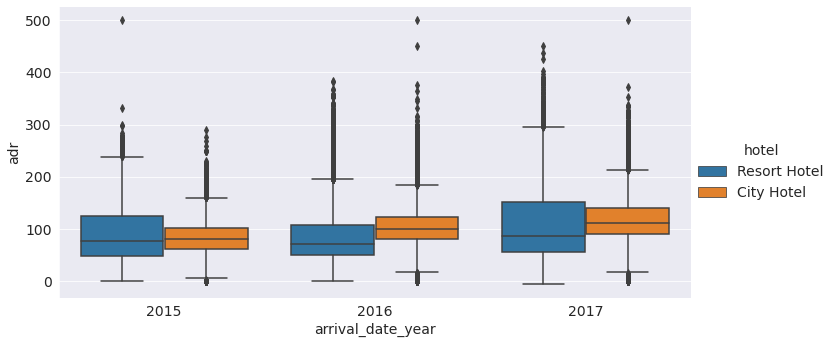

In [48]:
g = sns.catplot(x="arrival_date_year", y="adr",
                hue="hotel",
                kind="box",
               # col="is_canceled",
                data=hotel_bookings_df,
               height=5,
               aspect=2)

> ADR trends over the years from 2015 to 2017 cannot be analyzed accurately as the ADR data in the year 2015 is from July to Decemeber and for year 2017 its from January to August.
>> - We can see that there is no major difference in the Average Daily rates in the prices of Resort Hotel for all 3 years. In year 2015 and 2017 we can see positive skewness in the value of ADR, whereas a symmetric distribution in case of City Hotel ADR.
>> - As compared to City Hotel, Resort Hotel has low ADR values and much varience as compared to City Hotel ADR which is lessly distributed.



### Analyzing Weekend and Weekdays ADR trends 

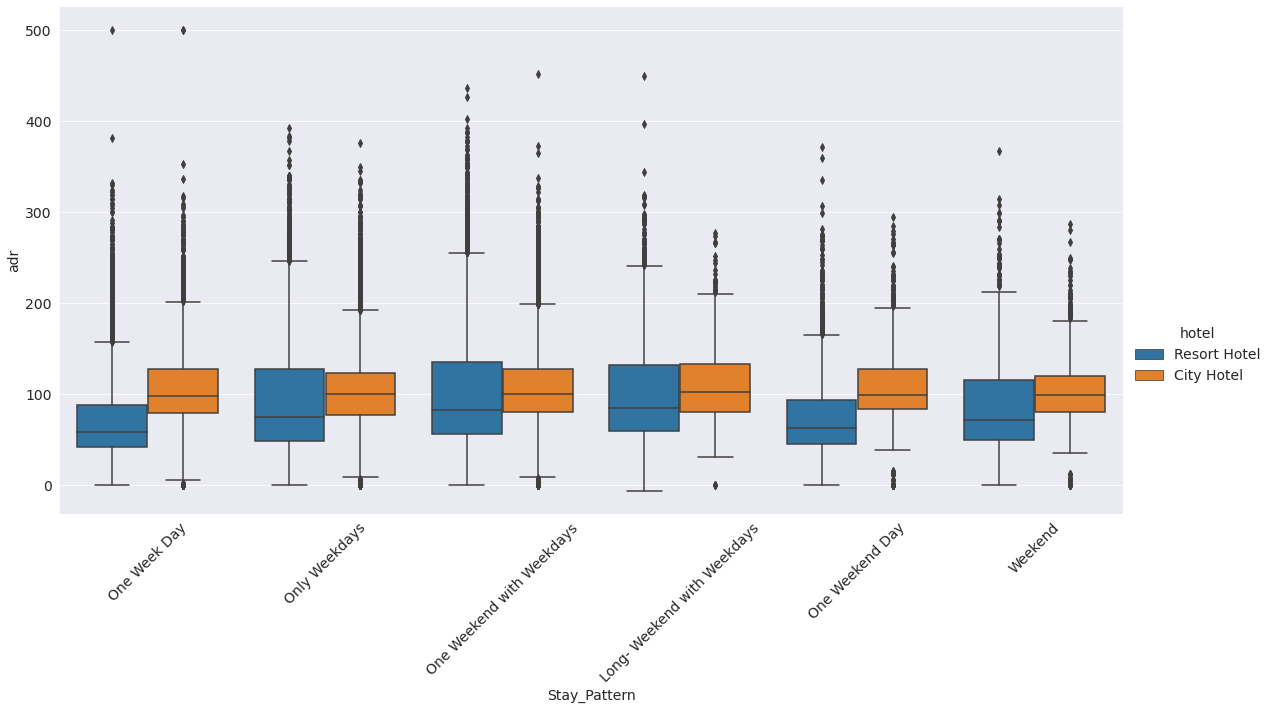

In [49]:

g = sns.catplot(x="Stay_Pattern", y="adr",
                hue="hotel",
                kind="box",
              #  col="arrival_date_month",
              #  col_wrap=2,
                data=hotel_bookings_df,
               height=8,
               aspect=2)
plt.xticks(rotation=45)
plt.show()

> The ADR remains almost similar in both the hotels irrespective of the number of nights a guests stays in the Hotel.
>> - As compared to City Hotel which has a similar ADR pattern across different stay patterns, Resort Hotel has low ADR when a guests books the Hotel for one day irrespective of the weekdays or weekends.

### Relationship between Room type and ADR

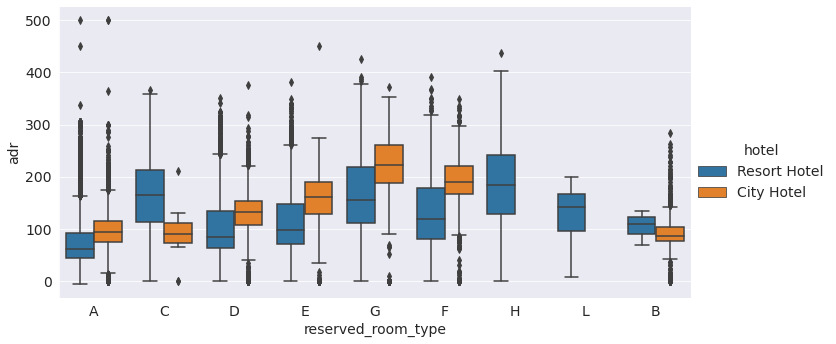

In [50]:
g = sns.catplot(x="reserved_room_type", y="adr",
                hue="hotel",
                kind="box",
             #   col="is_canceled",
                data=hotel_bookings_df,
               height=5,
               aspect=2)

> Analyzing ADR values across different room types, we can see that ADR value above 100 can be considered profitable.
>> In Resort Hotel, Room type C, G and F are the most profitable rooms, whereas in City Hotel, G is the most profitable room followed by rooms D and E.

### Relationship between waiting days and cancelation

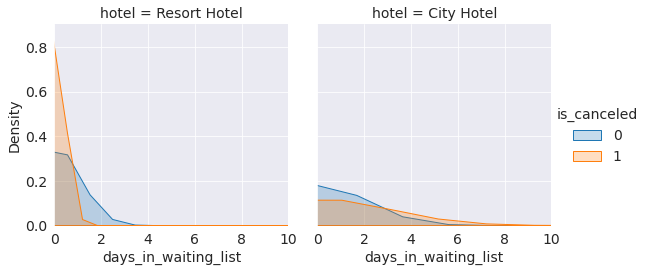

In [51]:
(sns.FacetGrid(hotel_bookings_df, hue = 'is_canceled',
               col="hotel",
             height = 4,
             xlim = (0,10))
    .map(sns.kdeplot, 'days_in_waiting_list', shade = True)
    .add_legend());

> By analyzing the relation of cancellations with respect to the number of days a guests is in waiting list, we can see dissimilar patterns in Resort Hotel and City Hotel.
>> - In Resort Hotel, if a customer is in waiting list for 1 day, chances of cancellations are less.
>> - In City Hotel, a person prefers may book or cancel the booking.

### Relationship between Lead time and Cancellations

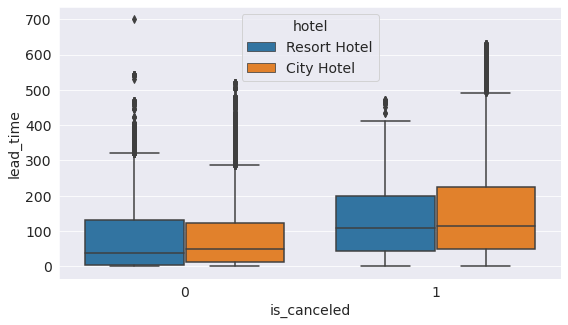

In [52]:
sns.boxplot(y=hotel_bookings_df["lead_time"], x=hotel_bookings_df["is_canceled"], hue=hotel_bookings_df["hotel"] )
plt.show()

> By analyzing the impact of the cancellations by lead time factor,
>> - We can see that if the lead time is within 100 days, the rate of cancellations made are less.
>> - The chances of cancellation increases if the lead time is beyond 100 days.

In [53]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ruchitabt234/hotel-bookings" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ruchitabt234/hotel-bookings


'https://jovian.com/ruchitabt234/hotel-bookings'

## Asking and Answering Questions

### Q-1 Which is the popular hotel amongest Vistors, City Hotel or Resort Hotel? ###

In [55]:
total_hotel_bookings= hotel_bookings_df.groupby(['hotel']).size().reset_index(name='count')
total_hotel_bookings['count']= round(total_hotel_bookings['count']*100/ hotel_bookings_df.shape[0], 2)
total_hotel_bookings

,hotel,count
0,City Hotel,66.54
1,Resort Hotel,33.46


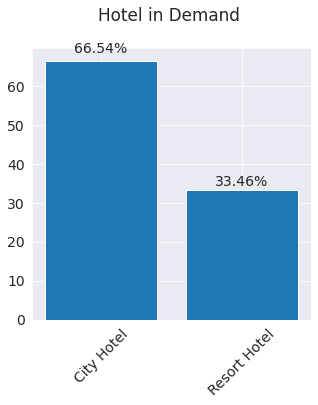

In [56]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title('Hotel in Demand \n')

graph = plt.bar(total_hotel_bookings['hotel'], total_hotel_bookings['count'])
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.03,
             str(total_hotel_bookings['count'][i])+'%',
             ha='center'
             )
    i += 1
plt.show()


> Popularity of City Hotel is 66.41 % higher as compared to Resort Hotel.

#### Trend of in hotel Reservations booking and cancellation

Now, Lets explore the pattern of cancellations vs booking in both City Hotel and Resort Hotel.

In [57]:
hotel_trends= hotel_bookings_df.groupby(['hotel', 'is_canceled'])['is_canceled'].size().reset_index(name='count')
hotel_trends['count']= round(hotel_trends['count']*100/ hotel_bookings_df.shape[0], 2)
hotel_trends

,hotel,is_canceled,count
0,City Hotel,0,38.66
1,City Hotel,1,27.89
2,Resort Hotel,0,24.08
3,Resort Hotel,1,9.37


In [58]:
#Function To plot values on the bar
def catplot_values():
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() +1
        g.ax.text(txt_x,txt_y,txt)   
    plt.show()

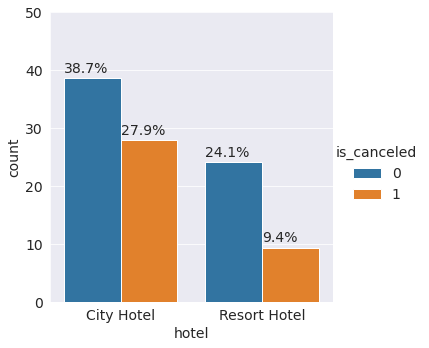

In [59]:
g = sns.catplot(x='hotel', y='count', hue='is_canceled', kind='bar', data=hotel_trends)
g.ax.set_ylim(0,50)

#To plot values on the bar
catplot_values() 

City Hotel has more number of cancellations and reservations as compared to Resort Hotel.

Overall, City Hotel has 38.65% of bookings and cancellations of 27.74% of the total bookings, whereas Resort Hotel sees 24.27% of bookings and cancellations of 9.32% of the total bookings.


For further analysis, we will target the vistors who did not cancel their bookings.

In [60]:
# Creating a seperate dataframe with confirmed hotel booking data.
confirmed_bookings_df = hotel_bookings_df[hotel_bookings_df.is_canceled==0]

In [61]:
# Creating a seperate dataframe with cancelled hotel booking data.
canceled_bookings_df = hotel_bookings_df[hotel_bookings_df.is_canceled==1]

### Q-2: Which are the top 10 countries with the Highest number of confirmed bookings and cancelled bookings?

In [62]:
top_10_countries_df = confirmed_bookings_df['Country_Name'].value_counts().reset_index()
top_10_countries_df.columns = ['Country_Name', 'Visitors']
top_10_countries_df = top_10_countries_df.head(10)
top_10_countries_df

,Country_Name,Visitors
0,Portugal,20449
1,United Kingdom,9644
2,France,8457
3,Spain,6368
4,Germany,6067
5,Ireland,2541
6,Italy,2424
7,Belgium,1865
8,Netherlands,1714
9,United States,1588


In [63]:
import numpy
def ConToPer(col):
    per = []
    for i in range(top_10_countries_df.shape[0]):
        p = (col[i] / hotel_bookings_df.shape[0]) * 100
        per.append(numpy.round(p, 2))
    return per

In [64]:
top_10_countries_df['Per'] = ConToPer(top_10_countries_df.Visitors)
top_10_countries_df

,Country_Name,Visitors,Per
0,Portugal,20449,17.25
1,United Kingdom,9644,8.13
2,France,8457,7.13
3,Spain,6368,5.37
4,Germany,6067,5.12
5,Ireland,2541,2.14
6,Italy,2424,2.04
7,Belgium,1865,1.57
8,Netherlands,1714,1.45
9,United States,1588,1.34


In [65]:
def top_10_countries_with_Confirmed():
    plt.figure(figsize=(16,8))
   
    plt.title('Top 10 countries with the Highest Bookings')

    graph = plt.bar(top_10_countries_df.Country_Name, top_10_countries_df.Per)

    #To plot values
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()

        plt.text(x+width/2,
                 y+height*1.03,
                 str(top_10_countries_df.Per[i])+'%',
                 ha='center'
                 )
        i += 1
    plt.show()

#### Top 10 Countries with Highest number of Cancellations ###

In [66]:
top_10_can_countries_df = canceled_bookings_df['Country_Name'].value_counts().reset_index()
top_10_can_countries_df.columns = ['Country_Name', 'Visitors']
top_10_can_countries_df = top_10_can_countries_df.head(10)
top_10_can_countries_df

,Country_Name,Visitors
0,Portugal,27494
1,United Kingdom,2451
2,Spain,2176
3,France,1932
4,Italy,1332
5,Germany,1218
6,Ireland,832
7,Brazil,829
8,United States,501
9,Belgium,473


In [67]:
top_10_can_countries_df['Per'] = ConToPer(top_10_can_countries_df.Visitors)

In [68]:
top_10_can_countries_df

,Country_Name,Visitors,Per
0,Portugal,27494,23.19
1,United Kingdom,2451,2.07
2,Spain,2176,1.84
3,France,1932,1.63
4,Italy,1332,1.12
5,Germany,1218,1.03
6,Ireland,832,0.70
7,Brazil,829,0.70
8,United States,501,0.42
9,Belgium,473,0.40


In [69]:
def top_10_countries_with_cancellations():
    plt.figure(figsize=(16,8))

    plt.title('Top 10 countries with the Highest Cancellations')

    graph = plt.bar(top_10_can_countries_df.Country_Name, top_10_can_countries_df.Per)

    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height() +1
        x, y = p.get_xy()

        plt.text(x+width/2,
                 y+height*1.03,
                 str(top_10_can_countries_df.Per[i])+'%',
                 ha='center'
                 )
        i += 1
    plt.show() 

#### Top 10 Country wise "Booking VS Cancellation" Trends ###

In [70]:
'''country_trends= hotel_bookings_df.groupby(['Country_Name','is_canceled'])['is_canceled'].count().reset_index(name='count')
country_trends['count']= round(country_trends['count']*100/ hotel_bookings_df.shape[0], 2)
country_trends=country_trends.sort_values('count', ascending=False).head(10)
country_trends'''

diff=pd.DataFrame()
diff['confirmed_booking']= confirmed_bookings_df['Country_Name'].value_counts()
diff['canceled_booking']= canceled_bookings_df['Country_Name'].value_counts()
diff['difference']= diff['confirmed_booking'] - diff['canceled_booking']
diff['diff_rate']= round(diff['difference']*100/ diff['difference'].sum(),2)
diff = diff.sort_values('difference', ascending=False)
diff= diff.head(10)
diff

,confirmed_booking,canceled_booking,difference,diff_rate
United Kingdom,9644,2451.0,7193.0,23.90
France,8457,1932.0,6525.0,21.68
Germany,6067,1218.0,4849.0,16.11
Spain,6368,2176.0,4192.0,13.93
Ireland,2541,832.0,1709.0,5.68
Belgium,1865,473.0,1392.0,4.63
Netherlands,1714,387.0,1327.0,4.41
not founded,1442,312.0,1130.0,3.75
Italy,2424,1332.0,1092.0,3.63
United States,1588,501.0,1087.0,3.61


In [71]:
#Finding top 10 Countries with higher Bookings vs Cancellations
def Book_vs_Cancel():
    plt.figure(figsize=(16,8))
    plt.title('Top 10 countries with higher Bookings vs Cancellations \n')
    
    graph = plt.bar(diff.index, diff.diff_rate)
 
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()

        plt.text(x+width/2,
                 y+height*1.03,
                 str(diff.diff_rate[i])+'%',
                 ha='center'
                 )
        i += 1
    plt.show()



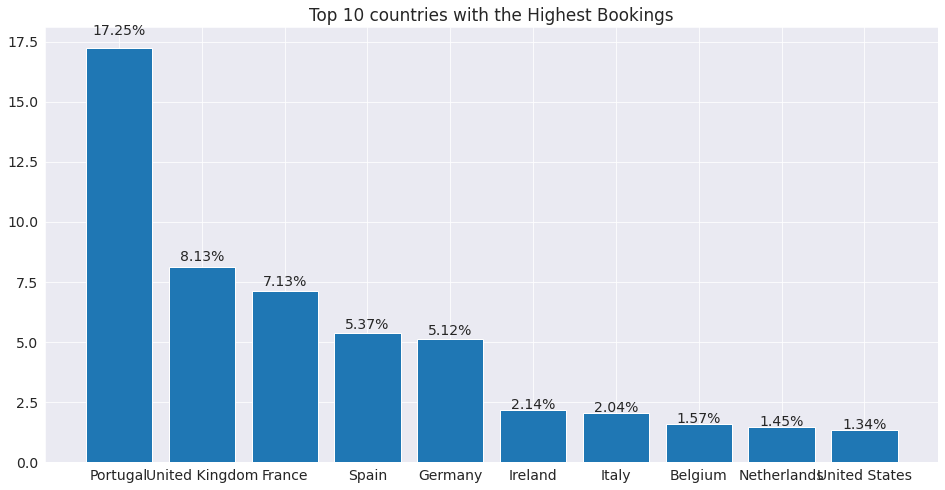

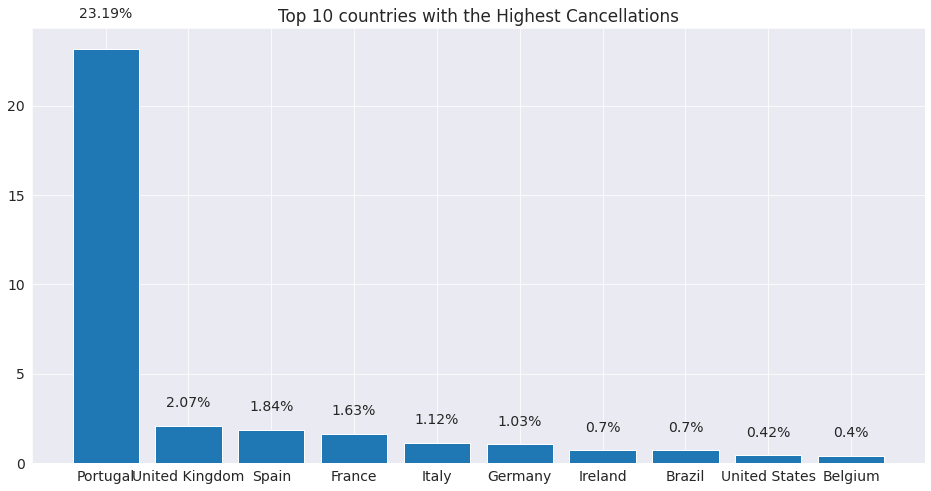

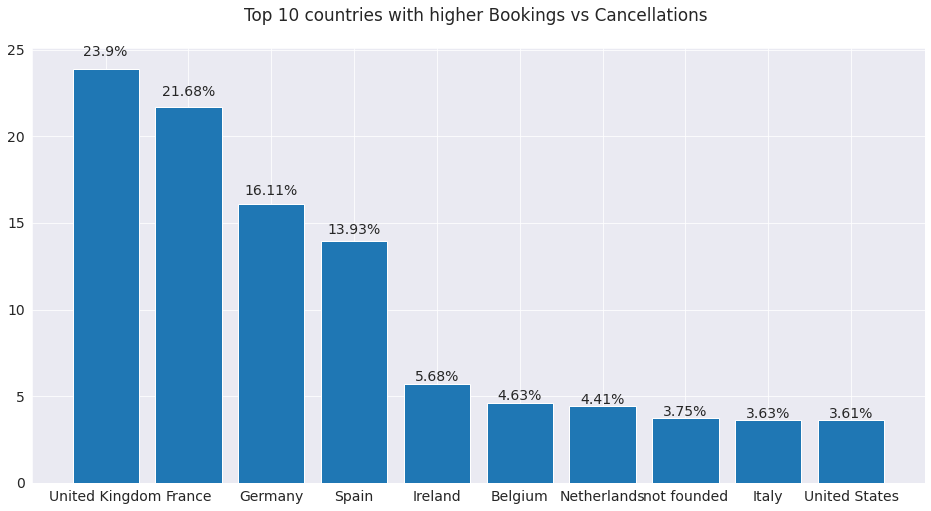

In [72]:
top_10_countries_with_Confirmed()  
top_10_countries_with_cancellations()  
Book_vs_Cancel()

> The highest number of conformed guests are from Portugal.
>> -  Portugal-17.25%, UK-8.13%, France-7.13%, Spain-5.37%, Germany-5.12%

> The highest number of canceled booking guests are also from Portugal
>> - Portugal-23.19%, UK-2.07%, Spain-1.84%, France-1.63%, Italy-1.12%

> Next, we tried to analyzed which country made fewer cancellations with respect to their bookings in order to figure out the loyal guests. The guests coming from UK made the least cancellations as compared to bookings amongst all the other countries.
>> - UK-23.9%, France-21.68%, Germany 16.11%, Spain 13.93%, Ireland 5.68%.
>> - By comparing top 10 countries with highest confirmations and cancellations, we can see that Ireland made it to top 5 countries with least number of cancellations.

### Q-3 Which type of customers make the highest number of reservations? ###

In [73]:
customer_trends= confirmed_bookings_df.groupby(['customer_type', 'hotel'])['hotel'].size().reset_index(name='count')
customer_trends['count']= round(customer_trends['count']*100/ confirmed_bookings_df.shape[0], 2)
customer_trends= customer_trends.sort_values('count', ascending=False)
customer_trends

,customer_type,hotel,count
4,Transient,City Hotel,42.98
5,Transient,Resort Hotel,27.54
6,Transient-Party,City Hotel,16.69
7,Transient-Party,Resort Hotel,8.34
1,Contract,Resort Hotel,2.16
0,Contract,City Hotel,1.59
2,Group,City Hotel,0.35
3,Group,Resort Hotel,0.34


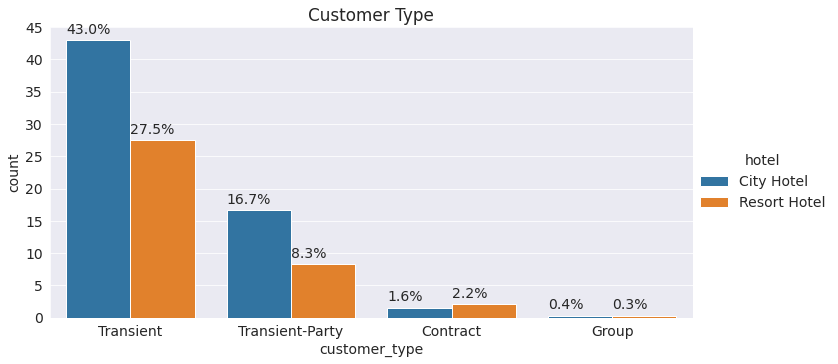

In [74]:
#plt.rcParams['figure.figsize']=[12,15]
g = sns.catplot(x='customer_type', y='count', hue='hotel', kind='bar', data=customer_trends, height=5, aspect=2)
plt.title("Customer Type")
g.ax.set_ylim(0,45)

#To plot values on the bar
catplot_values()  

plt.show()

> Amongst the different types of customers, 
>> - Transient customers with about 75.06% are the maximum to book City Hotel and Resort Hotel.
>> - Contract customers type choose Resort Hotel over City hotel.

### Q-4: Which month is preferred by most of the customer segment ?

In [75]:
customers= confirmed_bookings_df.groupby(['customer_type', 'arrival_date_year', 'arrival_date_month', 'hotel'])['customer_type'].size().reset_index(name='count')
#customers['count']= round(customers['count']*100/ confirmed_bookings_df.shape[0], 2)
customers= customers.sort_values('count', ascending=False)
customers

,customer_type,arrival_date_year,arrival_date_month,hotel,count
200,Transient,2017,May,City Hotel,1878
204,Transient,2017,July,City Hotel,1764
182,Transient,2016,August,City Hotel,1753
202,Transient,2017,June,City Hotel,1728
196,Transient,2017,March,City Hotel,1725
...,...,...,...,...,...
108,Group,2016,July,City Hotel,0
104,Group,2016,May,City Hotel,0
96,Group,2016,January,City Hotel,0
84,Group,2015,July,City Hotel,0


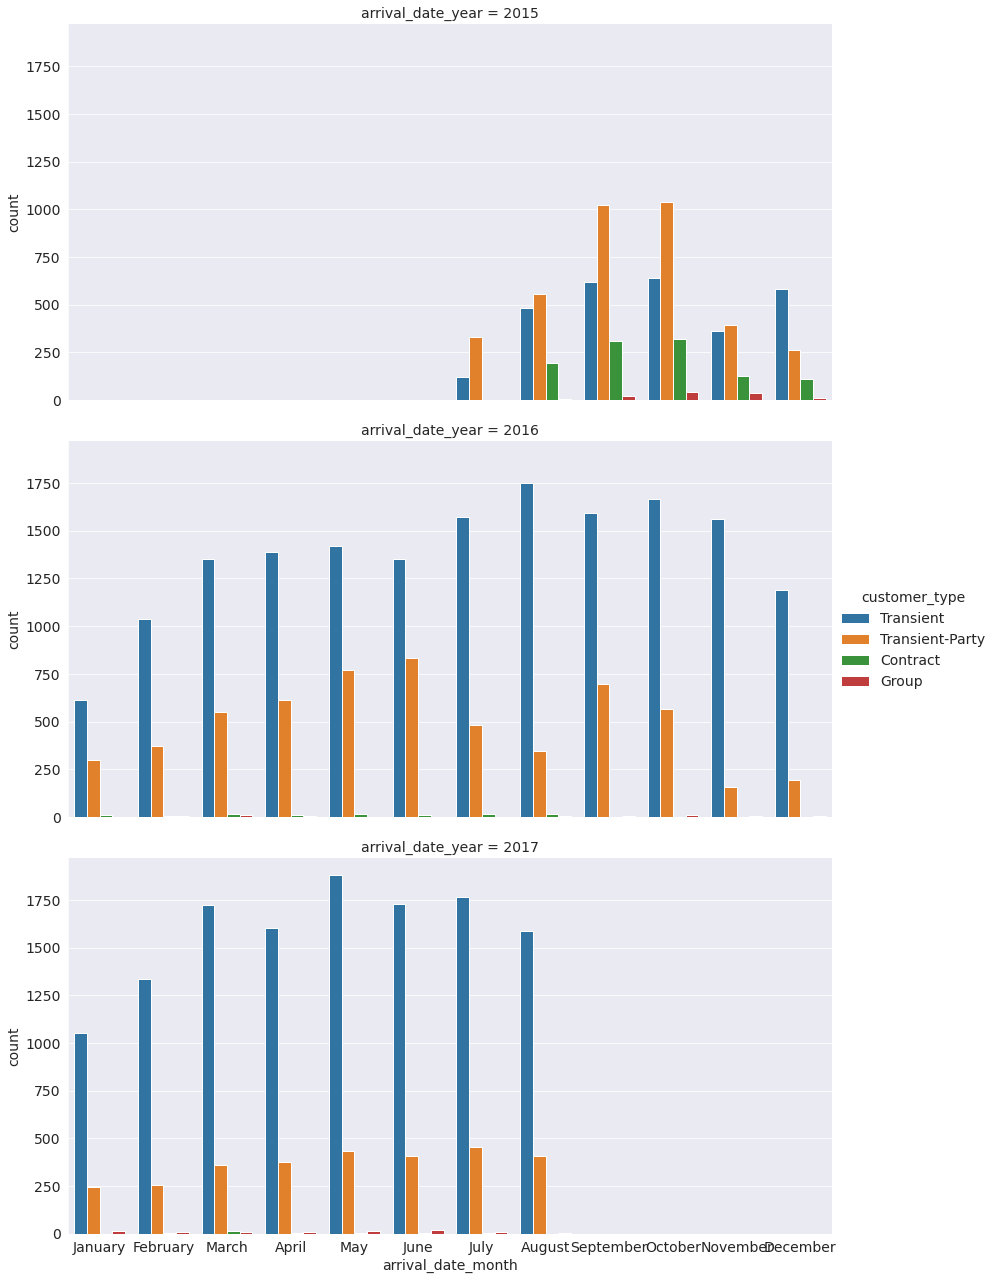

In [76]:
g = sns.catplot(x="arrival_date_month", y="count",
                hue="customer_type",
                kind="bar",
                row="arrival_date_year",
                data=customers[customers['hotel']=='City Hotel'], 
                height=6, 
                aspect=2)

plt.show()

Influx of Transient customers is almost high around all the year round except during the start of the year.

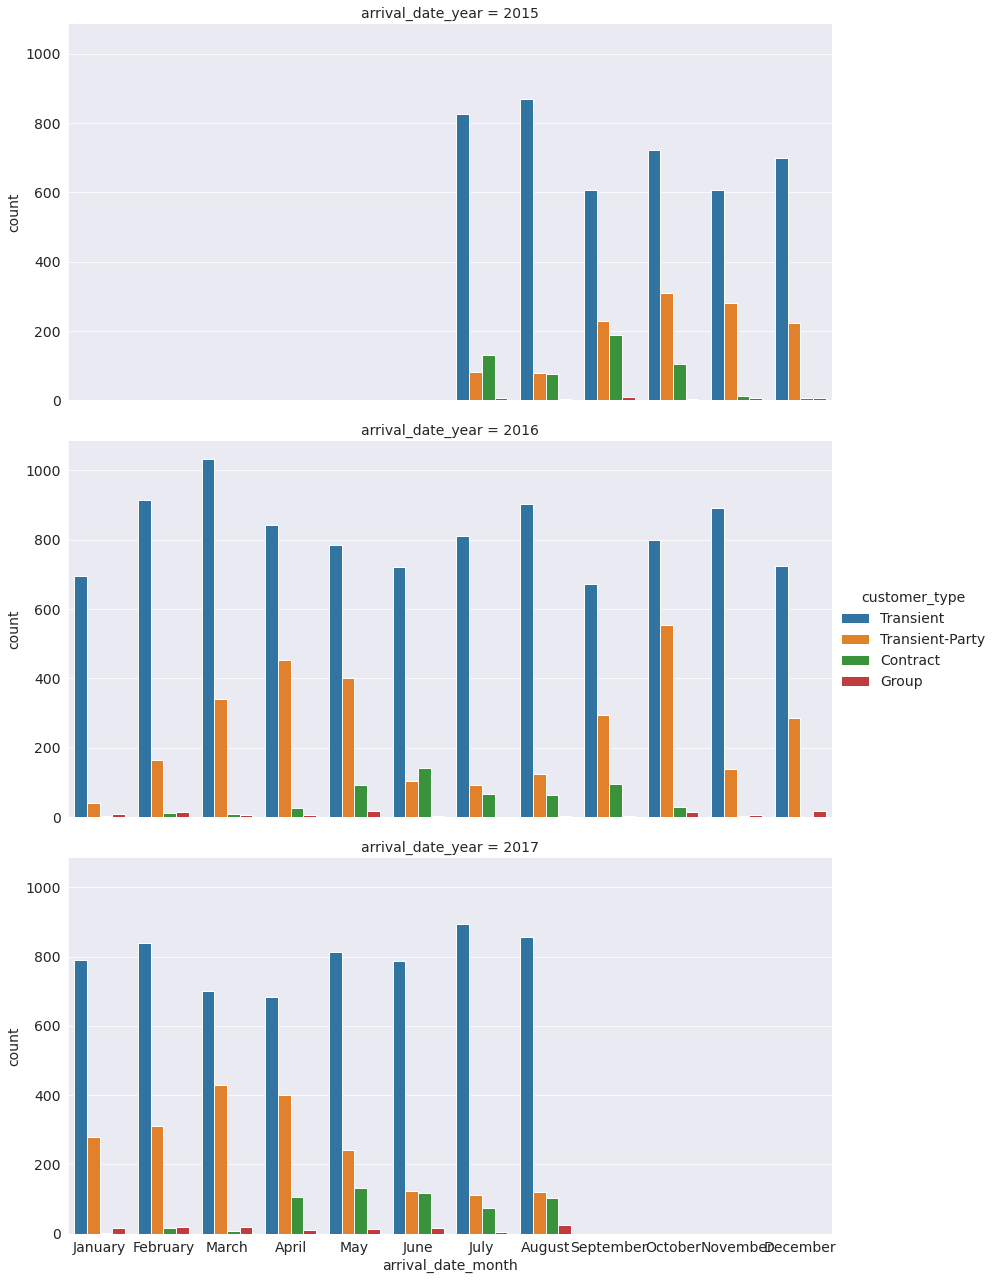

In [77]:
g = sns.catplot(x="arrival_date_month", y="count",
                hue="customer_type",
                kind="bar",
                row="arrival_date_year",
                data=customers[customers['hotel']=='Resort Hotel'], 
                height=6, 
                aspect=2)
plt.show()

In Resort Hotels, as compared to City Hotels we can see influx of Contract type customers and transient Party customers.

During the month of April to August we can see influx of Contract customers as compared to rest of the year months.

Transient-Party customers mostly visit the Resort hotel during the start and end of the year.

### Q-5 How many week days does the different customer types prefer to stay?

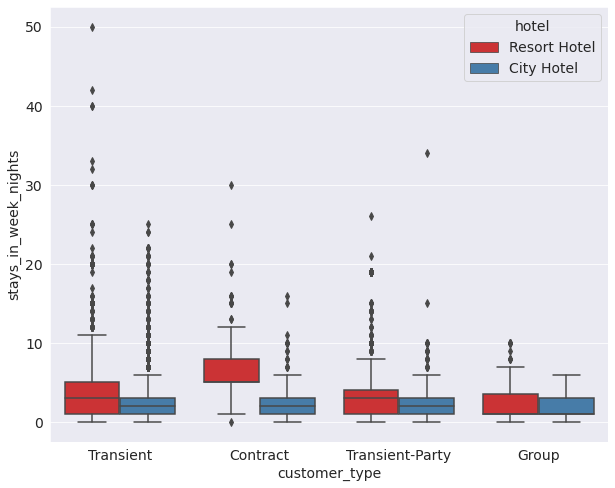

In [101]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = hotel_bookings_df, hue = "hotel", palette = 'Set1');


> In City Hotel, guests stay around 2-3 weekday nights on an average irrepective of the type of customer.
> 
>In Resort Hotel, guests stay a bit longer than the City Hotel,on an average around 2 to 5 weekday nights.

> Guests coming in Group prefer staying for only couple of weekday nights

### ### Q-6 How many weekend days does the different customer type prefer to stay?

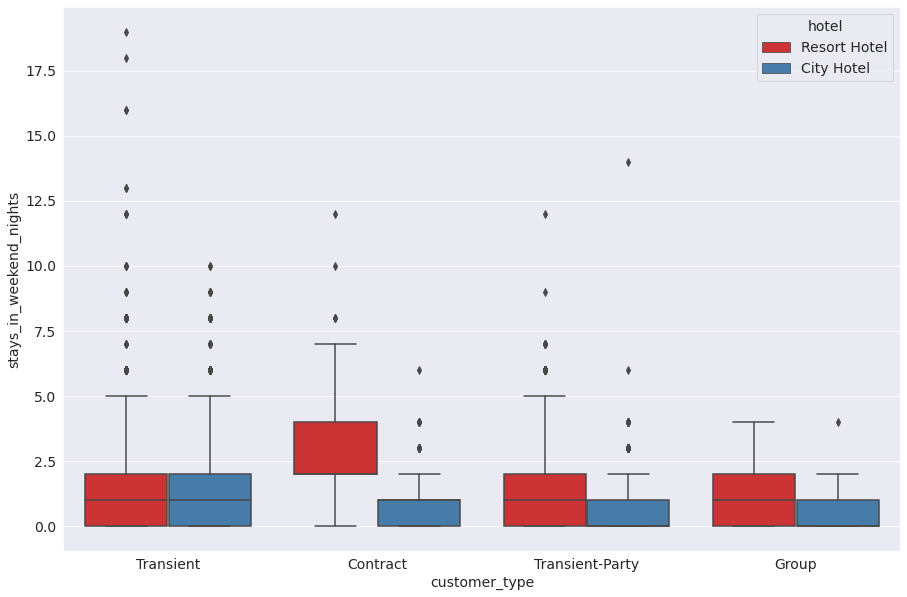

In [79]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "stays_in_weekend_nights", data = hotel_bookings_df, hue = "hotel", palette = 'Set1');


> We can see that except for Contract guests who prefers staying for 2 to 4 weekend nights in Resort Hotel, other customer types prefer upto 2 weekend nights in both the categories of Hotel

### Q-7: Which type of room is most preferred room by the guest?

In [80]:
pref_room= hotel_bookings_df.groupby(['hotel', 'reserved_room_type'])['hotel'].count().reset_index(name='count')
pref_room['count']= round(pref_room['count']*100/ hotel_bookings_df.shape[0], 2)
pref_room= pref_room.sort_values('count', ascending=False)
pref_room

,hotel,reserved_room_type,count
0,City Hotel,A,52.52
7,Resort Hotel,A,19.51
3,City Hotel,D,9.88
10,Resort Hotel,D,6.22
11,Resort Hotel,E,4.18
5,City Hotel,F,1.50
13,Resort Hotel,G,1.35
4,City Hotel,E,1.29
1,City Hotel,B,0.93
12,Resort Hotel,F,0.92


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


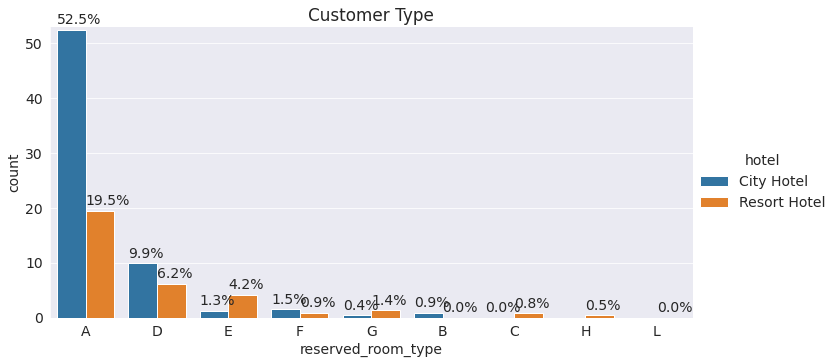

In [81]:
g = sns.catplot(x='reserved_room_type', y='count', hue='hotel', kind='bar', data=pref_room, height=5, aspect=2)
plt.title("Customer Type")
g.ax.set_ylim(0,53)

#To plot values on the bar
catplot_values()  

plt.show()

> The most preferred room by most of the guests is Room A and Room D in both the hotels.
>
> Looking at the popularity of other rooms, we can see that Room E, Room G, Room C, Room H is preferred more in Resort Hotel than in City Hotel.

### Q-8: Which type of guests are repeated the most?

In [116]:
repeat_guest_type= confirmed_bookings_df.groupby(['customer_type','hotel', 'is_repeated_guest'])['is_repeated_guest'].size().reset_index(name='count')
repeat_guest_type['count']= round(repeat_guest_type['count']*100/ confirmed_bookings_df.shape[0], 2)
repeat_guest_type= repeat_guest_type.sort_values('count', ascending=False)
repeat_guest_type = repeat_guest_type[repeat_guest_type['is_repeated_guest']==1]
repeat_guest_type

,customer_type,hotel,is_repeated_guest,count
10,Transient,Resort Hotel,1,1.72
8,Transient,City Hotel,1,1.64
14,Transient-Party,Resort Hotel,1,0.21
12,Transient-Party,City Hotel,1,0.18
6,Group,Resort Hotel,1,0.15
4,Group,City Hotel,1,0.05
2,Contract,Resort Hotel,1,0.02


posx and posy should be finite values
posx and posy should be finite values


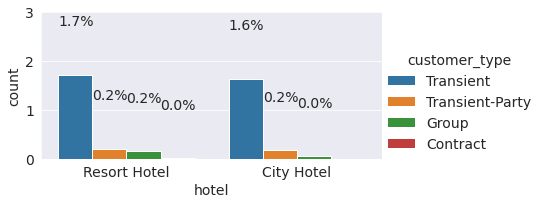

In [117]:
g = sns.catplot(x='hotel', y='count', kind='bar', hue='customer_type', data=repeat_guest_type, height=3, aspect=2)
#plt.title("Repeated Guests", fontdict={'fontsize': 12})
g.ax.set_ylim(0,3)
catplot_values()
plt.show()

> We can see that except few Transient customer types in both the Hotels, usually guests prefer staying in other Hotels.

### Q- 9 Which market segment holds the majority of the hotel reservations?

In [112]:
# Listing count of "market_segment" values
market_type= hotel_bookings_df.groupby(['market_segment', 'hotel', 'is_canceled'])['hotel'].size().reset_index(name='count')
market_type['count']= round(market_type['count']*100/ hotel_bookings_df.shape[0], 2)
market_type= market_type.sort_values('count', ascending=False)
market_type

,market_segment,hotel,is_canceled,count
22,Online TA,City Hotel,0,20.32
23,Online TA,City Hotel,1,12.21
24,Online TA,Resort Hotel,0,9.54
15,Groups,City Hotel,1,8.11
18,Offline TA/TO,City Hotel,0,7.99
19,Offline TA/TO,City Hotel,1,6.04
20,Offline TA/TO,Resort Hotel,0,5.29
25,Online TA,Resort Hotel,1,5.26
12,Direct,Resort Hotel,0,4.69
10,Direct,City Hotel,0,4.19


posx and posy should be finite values
posx and posy should be finite values


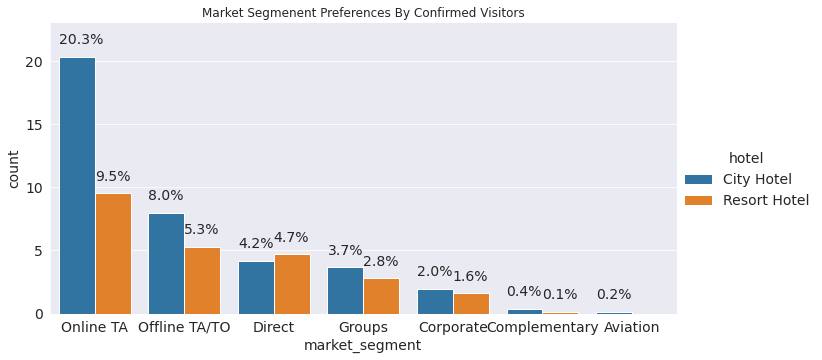

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


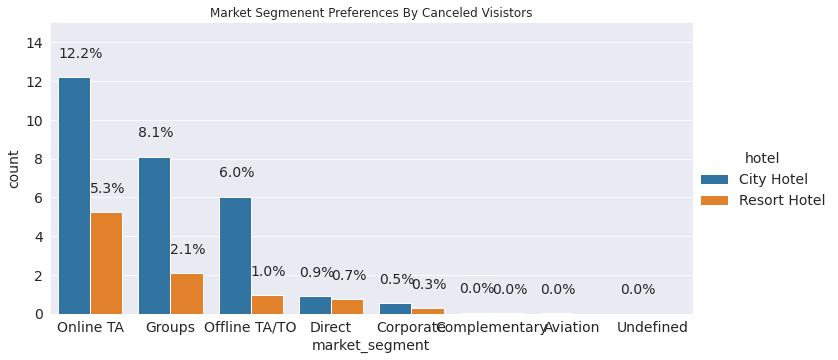

In [118]:
g = sns.catplot(x='market_segment', y='count', hue='hotel', kind='bar', data=market_type[market_type['is_canceled']==0], height=5, aspect=2)
plt.title("Market Segmenent Preferences By Confirmed Visitors", fontdict={'fontsize': 12})
g.ax.set_ylim(0,23)
#To plot values on the bar
catplot_values()
plt.show()

g = sns.catplot(x='market_segment', y='count', hue='hotel', kind='bar', data=market_type[market_type['is_canceled']==1], height=5, aspect=2)
plt.title("Market Segmenent Preferences By Canceled Visistors", fontdict={'fontsize': 12})
g.ax.set_ylim(0,15)
#To plot values on the bar
catplot_values()
plt.show()

> Online Travel Agents and Offline Travel Agents and Travel Operators makes the most of the confirmed hotel reservations for the guests.

> In canceled reservations guests, most of the bookings were made by Online Travel Agents and Groups

### Q- 10 Which is the leading distribution channel for booking hotel rooms?

In [119]:
# Listing count of "distribution_channel" values
channels= confirmed_bookings_df.groupby(['distribution_channel', 'hotel'])['hotel'].size().reset_index(name='count')
channels['count']= round(channels['count']*100/ hotel_bookings_df.shape[0], 2)
channels= channels.sort_values('count', ascending=False)
channels

,distribution_channel,hotel,count
5,TA/TO,City Hotel,31.75
6,TA/TO,Resort Hotel,16.51
3,Direct,Resort Hotel,5.44
2,Direct,City Hotel,4.60
0,Corporate,City Hotel,2.18
1,Corporate,Resort Hotel,2.14
4,GDS,City Hotel,0.13


posx and posy should be finite values
posx and posy should be finite values


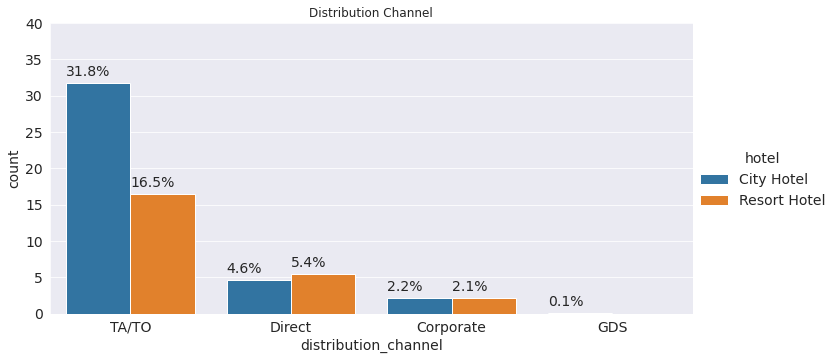

In [120]:
g = sns.catplot(x='distribution_channel', y='count', hue='hotel', kind='bar', data=channels, height=5, aspect=2)
plt.title("Distribution Channel", fontdict={'fontsize': 12})
g.ax.set_ylim(0,40)
#To plot values on the bar
catplot_values()
plt.show()

> Travel Agents/Travel Operators leads amongst the popular distribution channel for both the City Hotel and Resort Hotel.
> When comparing bookings made by Direct Distribution channel, we can see that they prefer Resort Hotel over City Hotel

### Q- 11 Which type of deposit is preferred mainly by the guests?

In [121]:
# Listing count of "deposit_type" values

deposit_type= confirmed_bookings_df.groupby(['deposit_type', 'hotel'])['hotel'].size().reset_index(name='count')
deposit_type['count']= round(deposit_type['count']*100/ confirmed_bookings_df.shape[0], 2)
deposit_type= deposit_type.sort_values('count', ascending=False)
deposit_type

,deposit_type,hotel,count
0,No Deposit,City Hotel,61.57
1,No Deposit,Resort Hotel,38.13
5,Refundable,Resort Hotel,0.16
3,Non Refund,Resort Hotel,0.09
2,Non Refund,City Hotel,0.03
4,Refundable,City Hotel,0.01


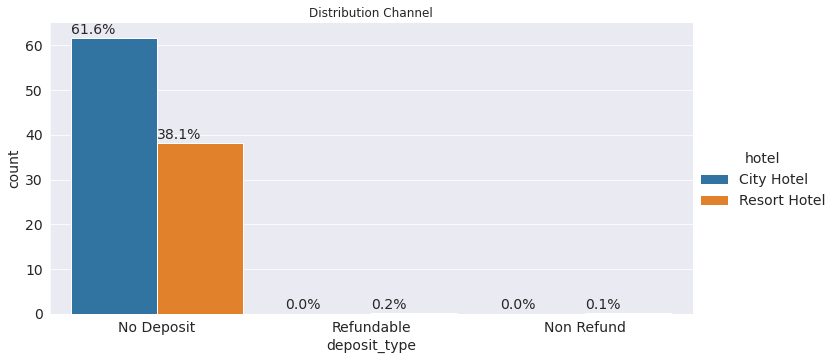

In [122]:
g = sns.catplot(x='deposit_type', y='count', hue='hotel', kind='bar', data=deposit_type, height=5, aspect=2)
plt.title("Distribution Channel", fontdict={'fontsize': 12})
g.ax.set_ylim(0,65)
#To plot values on the bar
catplot_values()
plt.show()

> Majority of the customers choose not to pay the deposit while making reservation. 

### Q- 12 Which is the preferred meal by the guests? ###

In [90]:
# Replacing shortform with full names#
hotel_bookings_df['meal'] = hotel_bookings_df['meal'].replace(['BB', 'FB', 'HB', 'SC'], ['Bed & Breakfast', 'Full Board', 'Half Board', 'SC'])

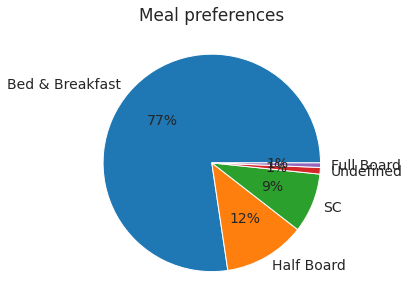

In [91]:
meal_type = hotel_bookings_df['meal'].value_counts().plot( 
    kind='pie', y='meal_type', autopct='%1.0f%%'
)
meal_type.set_ylabel('');
plt.title("Meal preferences")
plt.show()


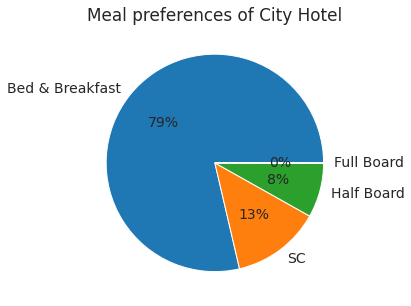

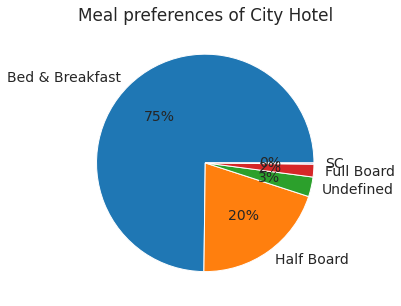

In [92]:
meal_type = hotel_bookings_df[hotel_bookings_df['hotel']=='City Hotel']['meal'].value_counts().plot( 
    kind='pie', y='meal_type', autopct='%1.0f%%'
)
meal_type.set_ylabel('');
plt.title("Meal preferences of City Hotel")
plt.show()

meal_type = hotel_bookings_df[hotel_bookings_df['hotel']=='Resort Hotel']['meal'].value_counts().plot( 
    kind='pie', y='meal_type', autopct='%1.0f%%'
)
meal_type.set_ylabel('');
plt.title("Meal preferences of City Hotel")
plt.show()


> Bed and Breakfast is the preferred choice of Meal for most of the customers in both Hotel and Resort.

Let us save and upload our work to Jovian before continuing

In [93]:
import jovian

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ruchitabt234/hotel-bookings" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ruchitabt234/hotel-bookings


'https://jovian.com/ruchitabt234/hotel-bookings'

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

> The Hotels receive 62.92% of confirmed booking and 37.07% of booking cancellations.
>> The City Hotel is in demand with 66.4% of bookings,whereas Resort Hotel has about 33.6% bookings.
>> Based on the booking to cancellation rate, City Hotel sees highest booking as well as cancellation rate as compared to Resort Hotel.
>>- City Hotel has 38.65% of bookings and cancellations of 27.74% of the total bookings, whereas Resort Hotel sees 24.27% of bookings and cancellations of 9.32% of the total bookings.

> The highest number of conformed guests are from Portugal.
>> -  Portugal-17.25%, UK-8.13%, France-7.13%, Spain-5.37%, Germany-5.12%
> The highest number of canceled booking guests are also from Portugal
>> - Portugal-23.19%, UK-2.07%, Spain-1.84%, France-1.63%, Italy-1.12%
> The guests coming from UK made the least cancellations as compared to bookings amongst all the other countries.
>> - UK-23.9%, France-21.68%, Germany 16.11%, Spain 13.93%, Ireland 5.68%.

> A large influx of guests are from July to August and lowest during the start of the year.

> Amongst the different types of customers, 
>> - Transient customers with about 75.06% are the maximum to book City Hotel and Resort Hotel.
>> - Contract customers type choose Resort Hotel over City hotel.

> The average stay of guests is 2 to 3 nights.
>> - In City Hotel, guests stay around 2-3 weekday nights on an average irrepective of the type of customer.
>> - In Resort Hotel, guests stay a bit longer than the City Hotel,on an average around 2 to 5 weekday nights.
>Guests coming in Group prefer staying for only couple of weekday nights

> The most preferred room by most of the guests is Room A and Room D in both the hotels.
>>  Looking at the popularity of other rooms, we can see that Room E, Room G, Room C, Room H is preferred more in Resort Hotel than in City Hotel.

> We can see that City Hotel is more prefered across all the market segments except the Direct ones.
>> - City hotel is the most prefered hotel by 32.4% of the Online Travel Agents followed by 12.7% of the Offline Travel Agents.
>> - Resort Hotel is prefered by 1% more than the city Hotel by the Direct market segment.

> Travel Agents/Travel Operators leads amongst the popular distribution channel for the City Hotel and Resort Hotel.
> Most of the customers choose not to pay the deposit while making reservation. 

> We can see that except for Contract guests who prefers staying for 2 to 4 weekend nights in Resort Hotel, other customer types prefer upto 2 weekend nights in both the categories of Hotel

> Except few Transient customer types in both the Hotels, guests usually prefer staying in other Hotels.

> Online Travel Agents and Offline Travel Agents and Travel Operators makes the most of the confirmed hotel reservations for the guests.

> Majority of the customers choose not to pay the deposit while making reservation.

> Bed and Breakfast is the preferred choice of Meal for most of the customers in both Hotel and Resort.


In [95]:
import jovian

In [96]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ruchitabt234/hotel-bookings" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ruchitabt234/hotel-bookings


'https://jovian.com/ruchitabt234/hotel-bookings'

## References and Future Work

This data can further be analysed using training datasets to predict the trends in type of room bookings and also to predict the peak month of the year.

In [97]:
import jovian

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ruchitabt234/hotel-bookings" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ruchitabt234/hotel-bookings


'https://jovian.com/ruchitabt234/hotel-bookings'